In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Reading Data

In [48]:
data=pd.read_csv('../dataset/iris/iris.data.csv')

In [49]:
data.head(5)

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [50]:
data.columns

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

In [51]:
data=data.rename(columns={"5.1":"sepal_length","3.5":"sepal_width","1.4":"petal_length","0.2":"petal_width","Iris-setosa":"species"})

In [53]:
data["species"] = data['species'].apply(lambda x: str(x).replace("Iris-",""))

In [54]:
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,setosa
1,4.7,3.2,1.3,0.2,setosa
2,4.6,3.1,1.5,0.2,setosa
3,5.0,3.6,1.4,0.2,setosa
4,5.4,3.9,1.7,0.4,setosa
5,4.6,3.4,1.4,0.3,setosa
6,5.0,3.4,1.5,0.2,setosa
7,4.4,2.9,1.4,0.2,setosa
8,4.9,3.1,1.5,0.1,setosa
9,5.4,3.7,1.5,0.2,setosa


### Descriptive statistics

In [55]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
data.isna().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [56]:
print(data.groupby("species").size())

species
setosa        49
versicolor    50
virginica     50
dtype: int64


### Summarization and Ploting

sepal_length       AxesSubplot(0.125,0.536818;0.352273x0.343182)
sepal_width     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
petal_length          AxesSubplot(0.125,0.125;0.352273x0.343182)
petal_width        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

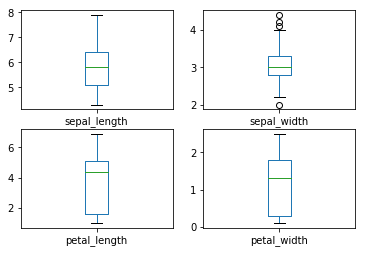

In [12]:
data.plot(kind="box",subplots=True,layout=(2,2))

### Univariate analysis

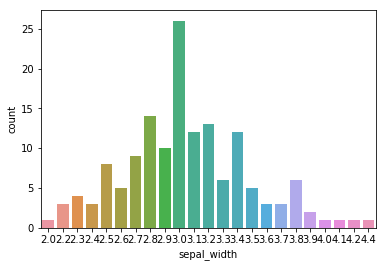

In [15]:
sns.countplot(data["sepal_width"])

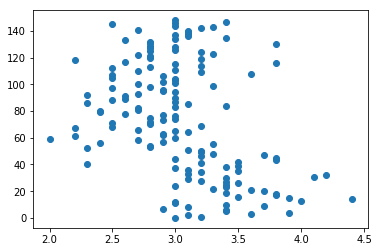

In [16]:
plt.scatter(data.sepal_width,y=range(data.shape[0]))

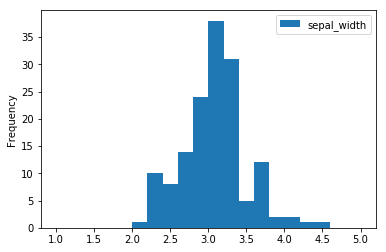

In [17]:
data.plot(y="sepal_width",kind="hist",bins=20,range=(1,5))

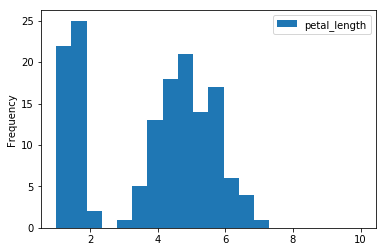

In [18]:
data.plot(y="petal_length",kind="hist",bins=20,range=(1,10))

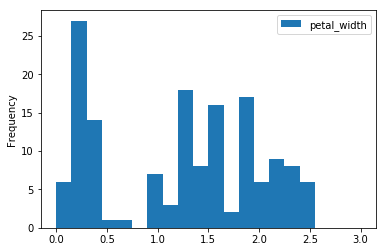

In [19]:
data.plot(y="petal_width",kind="hist",bins=20,range=(0,3))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024B03CE2320>,
      dtype=object)

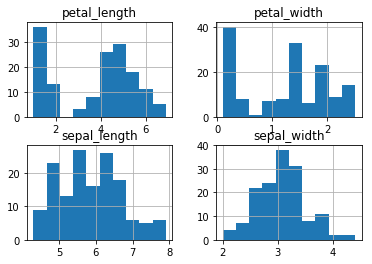

In [20]:
data.hist()

In [21]:
d=data.groupby("species").agg('count')['sepal_length']

In [22]:
data.groupby("species").agg('count')

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,49,49,49,49
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


Text(0,0.5,'sepal length count')

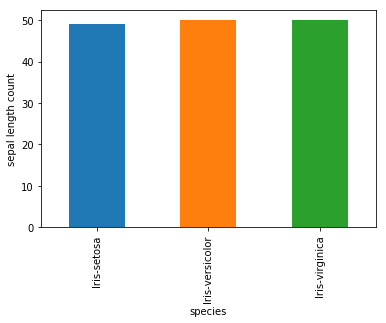

In [23]:
d.plot(kind="bar")
plt.ylabel("sepal length count")

### Multi variate distance

C:\Users\aspri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


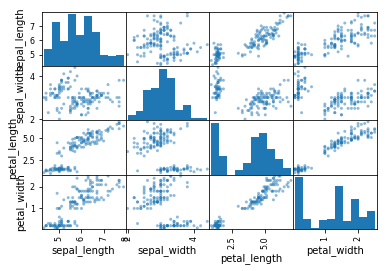

In [24]:
pd.scatter_matrix(data)
plt.show()

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score,classification_report
from sklearn.cross_validation import train_test_split


In [66]:
x=data.iloc[:,0:3].values

In [69]:
y=data.iloc[:,-1].values

In [72]:
X_train,X_test,y_train,y_test=train_test_split(x,y, test_size=0.25,random_state=True)

In [73]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [74]:
logpred=logmodel.predict(X_test)

In [78]:
print("classification_report\n",classification_report(y_test,logpred))

classification_report
              precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        13
 versicolor       1.00      0.64      0.78        14
  virginica       0.69      1.00      0.81        11

avg / total       0.91      0.87      0.87        38



## KNN  31/12/18

In [40]:
import numpy as np
import pandas as pd
import operator

In [176]:
data=pd.read_csv('../dataset/iris/iris.data.csv')

In [177]:
data

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


In [178]:
testSet = [[7.2, 3.6, 5.1, 2.5]]
test = pd.DataFrame(testSet)

In [179]:
length= test.shape[1]

In [37]:
# A=[4.9,3,1.4,0.2]
# B=[7.2,3.6,5.1,2.5]
# dist=0
# for x in range(len(B)):
#     dist+=np.square(A[x]-B[x])
# print(np.sqrt(dist))

4.962862077471023


In [52]:
#c=sorted(distance.values())

In [180]:
def euclideandistance(data1,data2,length):
    distance=0
    for x in range(length):
        distance+=np.square(data1[x]-data2[x])
    return np.sqrt(distance)

In [181]:
distance={}
for i in range(data.shape[0]):
    dist=euclideandistance(test,data.iloc[i],test.shape[1])
    distance[i]=dist[0]

In [182]:
distance

{0: 4.962862077471023,
 1: 5.112729212465687,
 2: 5.025932749251625,
 3: 4.880573736764972,
 4: 4.393176527297759,
 5: 5.032891812864648,
 6: 4.809365862564419,
 7: 5.225897052181567,
 8: 4.9254441424099005,
 9: 4.636809247747851,
 10: 4.831148931672464,
 11: 5.056678751908213,
 12: 5.525395913416522,
 13: 4.756048780237646,
 14: 4.50111097397076,
 15: 4.709564735726647,
 16: 4.790615826801393,
 17: 4.323193264243457,
 18: 4.716990566028302,
 19: 4.486646854834911,
 20: 4.6679760067935225,
 21: 5.372150407425317,
 22: 4.4788391353117385,
 23: 4.618441295502196,
 24: 4.768647607026545,
 25: 4.641120554348917,
 26: 4.718050444834179,
 27: 4.797916214358062,
 28: 4.893873721296862,
 29: 4.852834223420372,
 30: 4.5442271070007045,
 31: 4.792702786528704,
 32: 4.714870093650513,
 33: 4.9254441424099005,
 34: 5.049752469181039,
 35: 4.757099956906519,
 36: 4.9254441424099005,
 37: 5.2848841046895245,
 38: 4.764451699828638,
 39: 4.912229636326054,
 40: 5.316013544000805,
 41: 5.2659282182726

In [183]:
sortd=sorted(distance.items(),key=operator.itemgetter(1))

In [184]:
sortd

[(140, 0.6164414002968976),
 (138, 0.768114574786861),
 (119, 0.8062257748298554),
 (144, 0.8124038404635961),
 (143, 0.836660026534076),
 (139, 0.8717797887081347),
 (111, 0.9165151389911683),
 (123, 0.9273618495495708),
 (114, 0.9380831519646857),
 (109, 0.9486832980505139),
 (108, 1.0),
 (142, 1.0000000000000007),
 (135, 1.053565375285274),
 (146, 1.053565375285274),
 (147, 1.081665382639197),
 (101, 1.0816653826391973),
 (76, 1.1224972160321824),
 (51, 1.1747340124470729),
 (103, 1.1958260743101399),
 (124, 1.2083045973594573),
 (115, 1.2247448713915894),
 (136, 1.2409673645990857),
 (49, 1.2529964086141667),
 (131, 1.2727922061357855),
 (134, 1.284523257866513),
 (85, 1.2884098726725124),
 (128, 1.2884098726725126),
 (127, 1.3),
 (99, 1.3076696830622025),
 (110, 1.3601470508735443),
 (55, 1.3674794331177345),
 (102, 1.4282856857085704),
 (129, 1.4282856857085704),
 (75, 1.449137674618944),
 (126, 1.4491376746189442),
 (122, 1.466287829861518),
 (50, 1.4696938456699067),
 (64, 1.48

In [203]:
neighbour=[]
k=3
for x in range(k):
    neighbour.append(sortd[x][0])

In [204]:
class_votes={}
for x in range(len(neighbour)):
    response=data.iloc[neighbour[x]][-1]
    if response in class_votes:
        class_votes[response]+=1
    else:
        class_votes[response]=1

In [205]:
class_votes

{'Iris-virginica': 3}

In [206]:
sortd_classvotes=sorted(class_votes.items(),key=operator.itemgetter(1),reverse=True)

In [207]:
print(sortd_classvotes[0][0],neighbour)

Iris-virginica [140, 138, 119]


In [201]:
neighbour

[140, 138]